In [219]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyRegressor
import sklearn.metrics as metrics

# from random import gauss
# from mpl_toolkits.mplot3d import Axes3D

from statsmodels.formula.api import ols
import statsmodels.api as sm

from statsmodels.stats.multicomp import pairwise_tukeyhsd
from sklearn.model_selection import train_test_split

%matplotlib inline

In [220]:
# Shows *all* columns in dataframe, i.e. does not truncate horizontally
pd.set_option('display.max_columns', None)

# Converts from scientific notation to standard form (applied to every df in
# this notebook) and rounds to two decimal places
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [221]:
df = pd.read_csv('../data/kc_house_data.csv')

# Listing out column names
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [222]:
# Converting column `date` to datetime64[ns] from type string/object
df['date'] = df['date'].astype('datetime64[ns]')

In [223]:
df_copy = df.copy()

In [224]:
df_copy['id'].value_counts()

795000620     3
1825069031    2
2019200220    2
7129304540    2
1781500435    2
             ..
7812801125    1
4364700875    1
3021059276    1
880000205     1
1777500160    1
Name: id, Length: 21420, dtype: int64

In [225]:
df_copy = df_copy.sort_values(by=['id', 'date'])
df_copy = df_copy.drop_duplicates(subset=['id'], keep='last')

In [226]:
#looking at correlations
#fig, ax = plt.subplots(figsize=(15,15))
#heat = sns.heatmap(df_copy.corr(), annot = True)

In [227]:
df_copy.groupby('view').mean()

df_copy.sort_values('price', ascending = False)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,2014-10-13,7700000.00,6,8.00,12050,27600,2.50,NO,GOOD,Good,13 Mansion,8570,3480.0,1910,1987.00,98102,47.63,-122.32,3940,8800
3910,9808700762,2014-06-11,7060000.00,5,4.50,10040,37325,2.00,YES,AVERAGE,Average,11 Excellent,7680,2360.0,1940,2001.00,98004,47.65,-122.21,3930,25449
9245,9208900037,2014-09-19,6890000.00,6,7.75,9890,31374,2.00,NO,EXCELLENT,Average,13 Mansion,8860,1030.0,2001,0.00,98039,47.63,-122.24,4540,42730
4407,2470100110,2014-08-04,5570000.00,5,5.75,9200,35069,2.00,NO,NONE,Average,13 Mansion,6200,3000.0,2001,nan,98039,47.63,-122.23,3560,24345
1446,8907500070,2015-04-13,5350000.00,5,5.00,8000,23985,2.00,NO,EXCELLENT,Average,12 Luxury,6720,1280.0,2009,0.00,98004,47.62,-122.22,4600,21750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18453,7999600180,2014-05-29,83000.00,2,1.00,900,8580,1.00,NO,NONE,Average,5 Fair,900,0.0,1918,0.00,98168,47.47,-122.27,2060,6533
2139,1623049041,2014-05-08,82500.00,2,1.00,520,22334,1.00,NO,NONE,Fair,5 Fair,520,0.0,1951,0.00,98168,47.48,-122.30,1572,10570
16184,3028200080,2015-03-24,81000.00,2,1.00,730,9975,1.00,NaN,NONE,Poor,5 Fair,730,0.0,1943,0.00,98168,47.48,-122.31,860,9000
465,8658300340,2014-05-23,80000.00,1,0.75,430,5050,1.00,NaN,NONE,Fair,4 Low,430,0.0,1912,0.00,98014,47.65,-121.91,1200,7500


In [229]:
# Dropping irrelevant columns
df_copy.drop(columns = ['id', 'floors', 'waterfront',
                        'lat', 'long', 'condition', 'yr_renovated',
                         'sqft_lot15','sqft_above', 'sqft_living15',
                         'sqft_basement'],
                        inplace=True)

In [230]:
df_copy.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,view,grade,yr_built,zipcode
2495,2015-04-22,300000.00,6,3.00,2400,9373,NONE,7 Average,1991,98002
6729,2014-05-08,647500.00,4,1.75,2060,26036,NONE,8 Good,1947,98166
8404,2014-08-11,400000.00,3,1.00,1460,43000,NONE,7 Average,1952,98166
8800,2015-04-01,235000.00,3,1.00,1430,7599,NONE,6 Low Average,1930,98168
3553,2015-03-19,402500.00,4,2.00,1650,3504,NONE,7 Average,1951,98144


In [231]:
# Establishing target and predictor variables
X = df_copy.drop(columns = 'price')
y = df_copy.price

In [232]:
# Creating variables for train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [233]:
train_df = pd.concat([X_train, y_train], axis=1)

test_df = pd.concat([X_test, y_test], axis=1)

In [234]:
summary_of_view = df_copy.groupby('view').agg(['mean', 'std'])

summary_of_view

price           bedrooms      bathrooms      sqft_living  \
                mean       std     mean  std      mean  std        mean   
view                                                                      
AVERAGE    791956.68 510351.93     3.57 0.98      2.43 0.87     2651.20   
EXCELLENT 1454416.19 934214.96     3.63 1.10      2.78 1.07     3337.17   
FAIR       814386.56 513226.70     3.53 0.98      2.35 0.84     2573.51   
GOOD       972849.27 615076.79     3.67 0.93      2.67 0.89     3012.47   
NONE       498336.32 287341.26     3.35 0.92      2.07 0.74     2001.17   

                  sqft_lot           yr_built        zipcode        
              std     mean       std     mean   std     mean   std  
view                                                                
AVERAGE   1133.59 22331.72  60261.29  1964.82 29.70 98090.98 59.82  
EXCELLENT 1544.93 21762.46  35989.90  1965.77 27.23 98096.41 61.65  
FAIR      1042.89 12342.66  17078.17  1962.90 26.36 98096.60 61.08  
GOOD      1204.88 35010.67 109236.86  1967.34 30.00 98092.44 62.24  
NONE       837.19 14178.46  37109.10  1971.73 29.37 98076.21 52.33

In [235]:
# Figure out how to do this in a loop/function?
df_average = train_df[train_df['view'] == 'AVERAGE']
df_excellent = train_df[train_df['view'] == 'EXCELLENT']
df_fair = train_df[train_df['view'] == 'FAIR']
df_good = train_df[train_df['view'] == 'GOOD']
df_none = train_df[train_df['view'] == 'NONE']

In [236]:
train_df['view'].value_counts()

NONE         12910
AVERAGE        636
GOOD           342
FAIR           227
EXCELLENT      192
Name: view, dtype: int64

In [237]:
fvalue, pvalue = stats.f_oneway(df_average['price'], df_excellent['price'], df_fair['price'],
                                df_good['price'] , df_none['price'])

In [238]:
train_df.grade.value_counts()

7 Average        5964
8 Good           4021
9 Better         1773
6 Low Average    1330
10 Very Good      768
11 Excellent      256
5 Fair            150
12 Luxury          64
4 Low              15
13 Mansion          9
3 Poor              1
Name: grade, dtype: int64

In [239]:
# Dropping poor row, since there is only one
df3 = train_df.copy()
df3 = df3[df3['grade'] != '3 Poor']

In [240]:
df3.grade = [x.replace(" ", "_").strip() for x in df3.grade]

In [241]:
df3['grade'].value_counts()

7_Average        5964
8_Good           4021
9_Better         1773
6_Low_Average    1330
10_Very_Good      768
11_Excellent      256
5_Fair            150
12_Luxury          64
4_Low              15
13_Mansion          9
Name: grade, dtype: int64

In [242]:
# Might need a for loop or a function here
df_10 = train_df[train_df['grade'] == '10 Very Good']
df_11 = train_df[train_df['grade'] == '11 Excellent']
df_12 = train_df[train_df['grade'] == '12 Luxury']
df_4 = train_df[train_df['grade'] == '4 Low']
df_5 = train_df[train_df['grade'] == '5 Fair']
df_6 = train_df[train_df['grade'] == '6 Low Average']
df_7 = train_df[train_df['grade'] == '7 Average']
df_8 = train_df[train_df['grade'] == '8 Good']
df_9 = train_df[train_df['grade'] == '9 Better']

In [243]:
# Finding f-statistic and p-value using ANOVA testing

f_value_grade, p_value_grade = stats.f_oneway(df_10['price'], df_11['price'], df_12['price'],
                                              df_4['price'], df_5['price'], df_6['price'],
                                              df_7['price'], df_8['price'], df_9['price'])
p_value_grade

0.0

In [244]:
# Ad-hoc test to determine differeces in price vs. grade

df_grade = train_df[['grade', 'price']]

print(pairwise_tukeyhsd(df_grade['price'], df_grade['grade']))

                Multiple Comparison of Means - Tukey HSD, FWER=0.05                
    group1        group2       meandiff   p-adj      lower         upper     reject
-----------------------------------------------------------------------------------
 10 Very Good  11 Excellent    417530.918  0.001   358256.7302   476805.1057   True
 10 Very Good     12 Luxury  1147448.0039  0.001  1040589.9423  1254306.0655   True
 10 Very Good    13 Mansion  2595685.8511  0.001  2320310.6228  2871061.0795   True
 10 Very Good        3 Poor  -794536.3711 0.0691 -1616398.1531    27325.4109  False
 10 Very Good         4 Low  -837333.0378  0.001  -1051459.759  -623206.3165   True
 10 Very Good        5 Fair  -804799.6044  0.001  -878117.7255  -731481.4834   True
 10 Very Good 6 Low Average  -753662.5365  0.001  -790885.6363  -716439.4367   True
 10 Very Good     7 Average  -652893.8117  0.001  -684381.3604  -621406.2631   True
 10 Very Good        8 Good   -514039.101  0.001  -546382.8976  -481695.3044

In [245]:
#making the categorical variable
cate_column = df3[['grade', 'view', 'zipcode']]

cate_column

,grade,view,zipcode
2758,8_Good,NONE,98007
14622,7_Average,NONE,98058
5298,6_Low_Average,NONE,98058
2729,7_Average,NONE,98168
646,7_Average,NONE,98136
...,...,...,...
11282,7_Average,NONE,98178
16202,5_Fair,NONE,98166
9990,7_Average,NONE,98034
338,7_Average,NONE,98133


In [246]:
df3.view.value_counts()

NONE         12909
AVERAGE        636
GOOD           342
FAIR           227
EXCELLENT      192
Name: view, dtype: int64

In [247]:
df_copy.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'view', 'grade', 'yr_built', 'zipcode'],
      dtype='object')

In [248]:
len(df_copy.zipcode.unique())

70

In [249]:
ohe = OneHotEncoder(drop = 'if_binary')

column_name = ['grade', 'view', 'zipcode']
features = cate_column.copy()

features2 = features[column_name]

cate_ohe = ohe.fit_transform(features2)

cate_ohe

<14350x86 sparse matrix of type '<class 'numpy.float64'>'
	with 43050 stored elements in Compressed Sparse Row format>

In [250]:
name = ohe.get_feature_names_out()

In [251]:
df3.grade.value_counts()

7_Average        5964
8_Good           4021
9_Better         1773
6_Low_Average    1330
10_Very_Good      768
11_Excellent      256
5_Fair            150
12_Luxury          64
4_Low              15
13_Mansion          9
Name: grade, dtype: int64

In [252]:
cate_parsed = pd.DataFrame(cate_ohe.todense(), columns = name, index = features.index)
cate_parsed

,grade_10_Very_Good,grade_11_Excellent,grade_12_Luxury,grade_13_Mansion,grade_4_Low,grade_5_Fair,grade_6_Low_Average,grade_7_Average,grade_8_Good,grade_9_Better,view_AVERAGE,view_EXCELLENT,view_FAIR,view_GOOD,view_NONE,view_nan,zipcode_98001,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,zipcode_98019,zipcode_98022,zipcode_98023,zipcode_98024,zipcode_98027,zipcode_98028,zipcode_98029,zipcode_98030,zipcode_98031,zipcode_98032,zipcode_98033,zipcode_98034,zipcode_98038,zipcode_98039,zipcode_98040,zipcode_98042,zipcode_98045,zipcode_98052,zipcode_98053,zipcode_98055,zipcode_98056,zipcode_98058,zipcode_98059,zipcode_98065,zipcode_98070,zipcode_98072,zipcode_98074,zipcode_98075,zipcode_98077,zipcode_98092,zipcode_98102,zipcode_98103,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
2758,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
14622,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5298,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2729,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
646,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11282,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0

In [253]:
cate_parsed.drop(columns = ['view_FAIR', 'grade_4_Low'], inplace = True)

Dropping the view_Fair because it's not different in term of mean price compared to average, dropping low in grade because it's not significant to some other grades but significant to others.

In [254]:
# Creating dataframe with only numerical columns
numbers = train_df.select_dtypes(np.number)

In [255]:
#Rework to include only the train_df
ss = StandardScaler()

columns_name1 = ['price', 'sqft_living']
numbers_scaling = numbers.copy()

features= numbers_scaling[columns_name1]

scale1 = ss.fit(features)
scale2 = scale1.transform(features)
numbers_scaling[columns_name1] = scale2

numbers_scaling

,bedrooms,bathrooms,sqft_living,sqft_lot,yr_built,zipcode,price
2758,3,1.75,-0.15,8480,1962,98007,0.20
14622,4,2.50,-0.37,8476,1983,98058,-0.56
5298,2,1.00,-1.23,8236,1948,98058,-1.21
2729,3,1.00,-0.38,5247,1947,98168,-0.71
646,3,1.75,-0.44,6200,1916,98136,0.01
...,...,...,...,...,...,...,...
11282,2,1.00,-1.20,6448,1948,98178,-0.88
16202,3,2.00,-0.35,9685,1948,98166,-0.62
9990,5,3.25,1.17,10587,1960,98034,0.21
338,3,1.75,-0.73,8250,1954,98133,-0.75


In [284]:
numbers_scaling.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14351 entries, 2758 to 7977
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   bedrooms     14351 non-null  int64  
 1   bathrooms    14351 non-null  float64
 2   sqft_living  14351 non-null  float64
 3   sqft_lot     14351 non-null  int64  
 4   yr_built     14351 non-null  int64  
 5   zipcode      14351 non-null  int64  
 6   price        14351 non-null  float64
dtypes: float64(3), int64(4)
memory usage: 1.5 MB


In [289]:
cate_parsed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14350 entries, 2758 to 7977
Data columns (total 84 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   grade_10_Very_Good   14350 non-null  float64
 1   grade_11_Excellent   14350 non-null  float64
 2   grade_12_Luxury      14350 non-null  float64
 3   grade_13_Mansion     14350 non-null  float64
 4   grade_5_Fair         14350 non-null  float64
 5   grade_6_Low_Average  14350 non-null  float64
 6   grade_7_Average      14350 non-null  float64
 7   grade_8_Good         14350 non-null  float64
 8   grade_9_Better       14350 non-null  float64
 9   view_AVERAGE         14350 non-null  float64
 10  view_EXCELLENT       14350 non-null  float64
 11  view_GOOD            14350 non-null  float64
 12  view_NONE            14350 non-null  float64
 13  view_nan             14350 non-null  float64
 14  zipcode_98001        14350 non-null  float64
 15  zipcode_98002        14350 non-nul

In [288]:
cate_parsed.head()

,grade_10_Very_Good,grade_11_Excellent,grade_12_Luxury,grade_13_Mansion,grade_5_Fair,grade_6_Low_Average,grade_7_Average,grade_8_Good,grade_9_Better,view_AVERAGE,view_EXCELLENT,view_GOOD,view_NONE,view_nan,zipcode_98001,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,zipcode_98019,zipcode_98022,zipcode_98023,zipcode_98024,zipcode_98027,zipcode_98028,zipcode_98029,zipcode_98030,zipcode_98031,zipcode_98032,zipcode_98033,zipcode_98034,zipcode_98038,zipcode_98039,zipcode_98040,zipcode_98042,zipcode_98045,zipcode_98052,zipcode_98053,zipcode_98055,zipcode_98056,zipcode_98058,zipcode_98059,zipcode_98065,zipcode_98070,zipcode_98072,zipcode_98074,zipcode_98075,zipcode_98077,zipcode_98092,zipcode_98102,zipcode_98103,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
2758,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
14622,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5298,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2729,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
646,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [287]:
#combinig scale and ohe
scaled_and_parse_df = pd.concat([numbers_scaling, cate_parsed], axis = 1)

In [257]:
scaled_and_parse_df.columns = [x.replace(" ", "_").strip() for x in scaled_and_parse_df.columns]

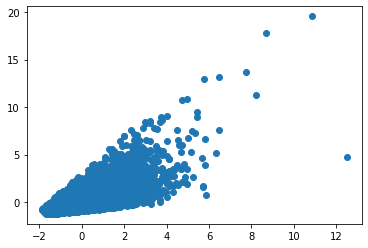

In [258]:
fig, ax = plt.subplots()

x = scaled_and_parse_df['sqft_living']
y = scaled_and_parse_df['price']


ax.scatter(x, y);

In [259]:
np.corrcoef(df['sqft_living'],df['price'])

array([[1.       , 0.7019173],
       [0.7019173, 1.       ]])

In [260]:
# Baseline model
# Import necessary package
from sklearn.dummy import DummyRegressor

# Instantiate
dummy_lr = DummyRegressor()

# Create variables
X = scaled_and_parse_df['sqft_living']
y = scaled_and_parse_df['price']

# Fit
dummy_lr.fit(X,y)

# Score
dummy_lr.score(X,y)

0.0

In [261]:
#Define X and y variable using scaled & parse dataframe

X_s_p = scaled_and_parse_df[['sqft_living']]
y_s_p = scaled_and_parse_df[['price']]

In [262]:
sk_lr = LinearRegression()
sk_lr.fit(X_s_p, y_s_p)
preds = sk_lr.predict(y_s_p)

preds

C:\Users\xiaoh\anaconda3\envs\learn-env\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- price
Feature names seen at fit time, yet now missing:
- sqft_living

  warnings.warn(message, FutureWarning)


array([[-0.00639063],
       [-0.68750623],
       [ 0.11917816],
       ...,
       [-0.2649463 ],
       [-0.26894357],
       [-0.41163539]])

In [263]:
X = scaled_and_parse_df['sqft_living']
y = scaled_and_parse_df[['price']]

In [264]:
X = scaled_and_parse_df['sqft_living']
y = scaled_and_parse_df[['price']]


In [265]:
X = scaled_and_parse_df['sqft_living']
y = scaled_and_parse_df[['price']]
resids = y - preds
resids

,price
1,-0.00
2,-0.30
3,0.05
4,-0.03
5,0.57
...,...
21592,-0.15
21593,-0.12
21594,-0.12
21595,-0.12


In [266]:
#Create out bins

bins = int( len(X)**.5)
bins

119

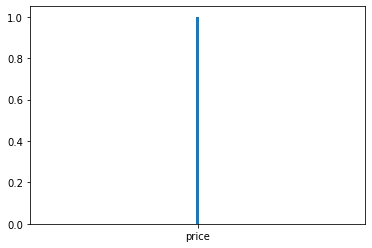

In [267]:
# Histogram of residuals

plt.hist(resids, bins=bins);

In [268]:
print(resids.max())
resids.min()

price   5.93
dtype: float64


price   -0.38
dtype: float64

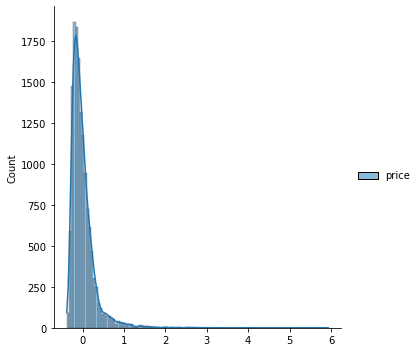

In [269]:
sns.displot(resids, bins=bins, kde=True)

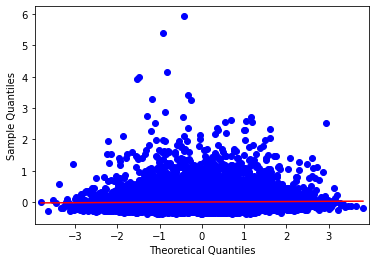

In [270]:
sm.qqplot(resids, line='r');

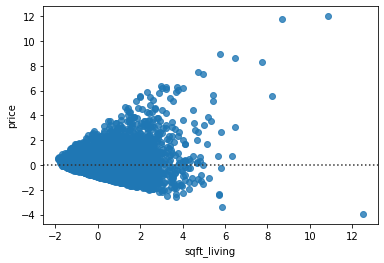

In [271]:
# resid plot sns.resid

sns.residplot(x=X, y=y);

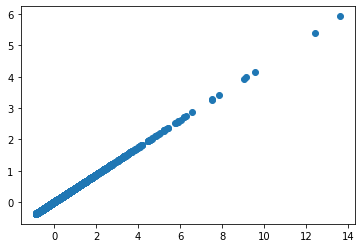

In [272]:
plt.scatter(preds, resids);

In [273]:
#Fit the dummy_regressor

dummy_lr.fit(X_s_p,y_s_p)

DummyRegressor()

In [274]:
# Score it

dummy_lr.score(X_s_p,y_s_p)

0.0

In [275]:
# Creating a straightforward, initial model --
# just for kicks
simple_formula = 'price ~ sqft_living'
simple_model = ols(formula = simple_formula,
                   data = scaled_and_parse_df).fit()
simple_mod_summ = simple_model.summary()

simple_mod_summ

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.485
Model:                            OLS   Adj. R-squared:                  0.485
Method:                 Least Squares   F-statistic:                 1.352e+04
Date:                Tue, 29 Mar 2022   Prob (F-statistic):               0.00
Time:                        11:16:42   Log-Likelihood:                -15600.
No. Observations:               14351   AIC:                         3.120e+04
Df Residuals:                   14349   BIC:                         3.122e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    4.377e-18      0.006   7.31e-16      1.000      -0.012       0.012
sqft_living     0.6965      0.006    116.281      0.000       0.685       0.708
==============================================================================
Omnibus:                    10207.576   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           421124.803
Skew:                           2.938   Prob(JB):                         0.00
Kurtosis:                      28.880   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

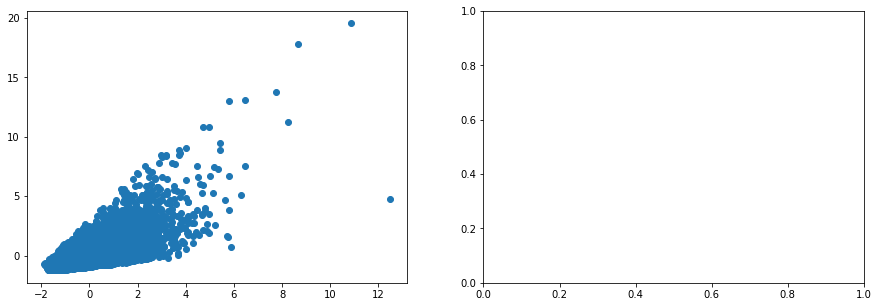

In [276]:
fig, ax = plt.subplots(ncols=2,figsize=(15,5))

x1 = scaled_and_parse_df[['sqft_living']]
y1 = scaled_and_parse_df[['price']]

# x2 = scaled_and_parse_df[['bedrooms']]

ax[0].scatter(x1, y1)
# ax[1].scatter(x2,y1);

In [277]:
simple_formula3 = 'price ~ sqft_living'
simple_model3 = ols(formula = simple_formula3,
                   data = scaled_and_parse_df).fit()
simple_mod_summ3 = simple_model3.summary()

simple_mod_summ3

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.485
Model:                            OLS   Adj. R-squared:                  0.485
Method:                 Least Squares   F-statistic:                 1.352e+04
Date:                Tue, 29 Mar 2022   Prob (F-statistic):               0.00
Time:                        11:16:44   Log-Likelihood:                -15600.
No. Observations:               14351   AIC:                         3.120e+04
Df Residuals:                   14349   BIC:                         3.122e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    4.377e-18      0.006   7.31e-16      1.000      -0.012       0.012
sqft_living     0.6965      0.006    116.281      0.000       0.685       0.708
==============================================================================
Omnibus:                    10207.576   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           421124.803
Skew:                           2.938   Prob(JB):                         0.00
Kurtosis:                      28.880   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [278]:
simple_formula4 = 'price ~ sqft_living + view_GOOD +view_NONE + grade_11_Excellent + grade_12_Luxury + grade_13_Mansion + grade_5_Fair + grade_6_Low_Average + grade_7_Average + grade_8_Good+ grade_9_Better'          

simple_model4 = ols(formula = simple_formula4,
                   data = scaled_and_parse_df).fit()

simple_mod_summ4 = simple_model4.summary()

simple_mod_summ4

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.597
Model:                            OLS   Adj. R-squared:                  0.596
Method:                 Least Squares   F-statistic:                     1929.
Date:                Tue, 29 Mar 2022   Prob (F-statistic):               0.00
Time:                        11:16:45   Log-Likelihood:                -13846.
No. Observations:               14350   AIC:                         2.772e+04
Df Residuals:                   14338   BIC:                         2.781e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               1.2171      0.032     38.350      0.000       1.155       1.279
sqft_living             0.3665      0.008     43.885      0.000       0.350       0.383
view_GOOD              -0.0175      0.039     -0.445      0.656      -0.095       0.060
view_NONE              -0.5236      0.021    -25.487      0.000      -0.564      -0.483
grade_11_Excellent      0.7462      0.046     16.050      0.000       0.655       0.837
grade_12_Luxury         2.2161      0.085     26.189      0.000       2.050       2.382
grade_13_Mansion        5.4526      0.216     25.273      0.000       5.030       5.875
grade_5_Fair           -1.0629      0.061    -17.450      0.000      -1.182      -0.944
grade_6_Low_Average    -1.0099      0.035    -28.703      0.000      -1.079      -0.941
grade_7_Average        -0.9362      0.029    -32.304      0.000      -0.993      -0.879
grade_8_Good           -0.7880      0.027    -28.826      0.000      -0.842      -0.734
grade_9_Better         -0.4661      0.028    -16.789      0.000      -0.521      -0.412
==============================================================================
Omnibus:                     9594.528   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           435944.485
Skew:                           2.636   Prob(JB):                         0.00
Kurtosis:                      29.482   Cond. No.                         59.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [279]:
simple_formula4 = 'price ~  view_GOOD + view_NONE + grade_11_Excellent + grade_12_Luxury + grade_13_Mansion + grade_5_Fair + grade_6_Low_Average + grade_7_Average + grade_8_Good+ grade_9_Better'          

simple_model4 = ols(formula = simple_formula4,
                   data = scaled_and_parse_df).fit()

simple_mod_summ4 = simple_model4.summary()

simple_mod_summ4

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.543
Model:                            OLS   Adj. R-squared:                  0.542
Method:                 Least Squares   F-statistic:                     1701.
Date:                Tue, 29 Mar 2022   Prob (F-statistic):               0.00
Time:                        11:16:45   Log-Likelihood:                -14751.
No. Observations:               14350   AIC:                         2.952e+04
Df Residuals:                   14339   BIC:                         2.961e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               1.8410      0.030     60.924      0.000       1.782       1.900
view_GOOD               0.0026      0.042      0.063      0.950      -0.080       0.085
view_NONE              -0.6256      0.022    -28.775      0.000      -0.668      -0.583
grade_11_Excellent      1.0925      0.049     22.389      0.000       0.997       1.188
grade_12_Luxury         2.9836      0.088     33.836      0.000       2.811       3.156
grade_13_Mansion        6.9338      0.227     30.553      0.000       6.489       7.379
grade_5_Fair           -2.0357      0.060    -33.690      0.000      -2.154      -1.917
grade_6_Low_Average    -1.8941      0.031    -61.661      0.000      -1.954      -1.834
grade_7_Average        -1.6227      0.026    -62.452      0.000      -1.674      -1.572
grade_8_Good           -1.2797      0.027    -48.191      0.000      -1.332      -1.228
grade_9_Better         -0.6922      0.029    -23.824      0.000      -0.749      -0.635
==============================================================================
Omnibus:                    10942.790   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           763341.980
Skew:                           3.086   Prob(JB):                         0.00
Kurtosis:                      38.193   Cond. No.                         58.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [280]:
simple_formula4 = 'price ~ sqft_living + grade_11_Excellent + grade_12_Luxury + grade_13_Mansion + grade_5_Fair + grade_6_Low_Average + grade_7_Average + grade_8_Good+ grade_9_Better'          

simple_model4 = ols(formula = simple_formula4,
                   data = scaled_and_parse_df).fit()

simple_mod_summ4 = simple_model4.summary()

simple_mod_summ4

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.574
Model:                            OLS   Adj. R-squared:                  0.574
Method:                 Least Squares   F-statistic:                     2149.
Date:                Tue, 29 Mar 2022   Prob (F-statistic):               0.00
Time:                        11:16:45   Log-Likelihood:                -14235.
No. Observations:               14350   AIC:                         2.849e+04
Df Residuals:                   14340   BIC:                         2.857e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.7694      0.027     28.967      0.000       0.717       0.821
sqft_living             0.3976      0.009     46.757      0.000       0.381       0.414
grade_11_Excellent      0.7917      0.048     16.583      0.000       0.698       0.885
grade_12_Luxury         2.3098      0.087     26.590      0.000       2.140       2.480
grade_13_Mansion        5.4883      0.222     24.762      0.000       5.054       5.923
grade_5_Fair           -1.0767      0.063    -17.206      0.000      -1.199      -0.954
grade_6_Low_Average    -1.0327      0.036    -28.581      0.000      -1.104      -0.962
grade_7_Average        -0.9728      0.030    -32.707      0.000      -1.031      -0.914
grade_8_Good           -0.8116      0.028    -28.914      0.000      -0.867      -0.757
grade_9_Better         -0.4744      0.029    -16.633      0.000      -0.530      -0.418
==============================================================================
Omnibus:                     9836.399   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           426900.603
Skew:                           2.756   Prob(JB):                         0.00
Kurtosis:                      29.146   Cond. No.                         46.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [281]:
simple_formula4 = 'price ~ sqft_living + view_GOOD + view_NONE'          

simple_model4 = ols(formula = simple_formula4,
                   data = scaled_and_parse_df).fit()

simple_mod_summ4 = simple_model4.summary()

simple_mod_summ4

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.514
Model:                            OLS   Adj. R-squared:                  0.514
Method:                 Least Squares   F-statistic:                     5058.
Date:                Tue, 29 Mar 2022   Prob (F-statistic):               0.00
Time:                        11:16:46   Log-Likelihood:                -15184.
No. Observations:               14350   AIC:                         3.038e+04
Df Residuals:                   14346   BIC:                         3.041e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.5263      0.022     24.464      0.000       0.484       0.568
sqft_living     0.6489      0.006    107.295      0.000       0.637       0.661
view_GOOD       0.0089      0.043      0.207      0.836      -0.076       0.094
view_NONE      -0.5853      0.022    -26.028      0.000      -0.629      -0.541
==============================================================================
Omnibus:                    10046.118   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           449207.526
Skew:                           2.837   Prob(JB):                         0.00
Kurtosis:                      29.816   Cond. No.                         10.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [283]:
scaled_and_parse_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14351 entries, 1 to 21596
Data columns (total 91 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   bedrooms             14351 non-null  int64  
 1   bathrooms            14351 non-null  float64
 2   sqft_living          14351 non-null  float64
 3   sqft_lot             14351 non-null  int64  
 4   yr_built             14351 non-null  int64  
 5   zipcode              14351 non-null  int64  
 6   price                14351 non-null  float64
 7   grade_10_Very_Good   14350 non-null  float64
 8   grade_11_Excellent   14350 non-null  float64
 9   grade_12_Luxury      14350 non-null  float64
 10  grade_13_Mansion     14350 non-null  float64
 11  grade_5_Fair         14350 non-null  float64
 12  grade_6_Low_Average  14350 non-null  float64
 13  grade_7_Average      14350 non-null  float64
 14  grade_8_Good         14350 non-null  float64
 15  grade_9_Better       14350 non-null 

In [282]:
sm.OLS(y_train, sm.add_constant(scaled_and_parse_df)).fit()

MissingDataError: exog contains inf or nans